In [20]:
#Basic lib's and regression models
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#lib's for graph
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

#Lib for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [21]:
univBankData = pd.read_csv("UnivBank.csv",index_col=0)

In [22]:
univBankData.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [23]:
univBankData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [24]:
#Data Explorartion
univBankData['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

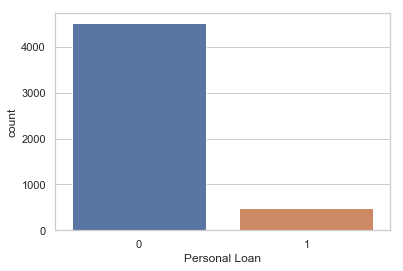

<Figure size 432x288 with 0 Axes>

In [25]:
sns.countplot(x='Personal Loan',data=univBankData)
plt.show()
plt.savefig('univBankData_Personal_Loan_plot.png')

In [26]:
#Create Dummy variables
cat_vars=['Family','Education']
for var in cat_vars:
    cat_list = pd.get_dummies(univBankData[var],prefix=var)
    data1 = univBankData.join(cat_list)
    univBankData = data1

In [27]:
#Remove orginal col's 
univBankData = univBankData.drop(cat_vars, axis=1)

In [31]:
univBankData.head(5)

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
ID,,,,,,,,,,,,,,,,,,
1,25,1,49,91107,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
2,45,19,34,90089,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
3,39,15,11,94720,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,35,9,100,94112,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
5,35,8,45,91330,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [29]:
univBankData.groupby('Personal Loan').mean() #groupby with the numerical col's using mean

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
Personal Loan,,,,,,,,,,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,1.729009,51.789381,0.102212,0.035841,0.595796,0.293584,0.301991,0.263274,0.194027,0.240708,0.443142,0.270133,0.286726
1,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833,0.125000,0.291667,0.606250,0.297917,0.222917,0.220833,0.277083,0.279167,0.193750,0.379167,0.427083


In [30]:
univBankData.groupby('Age').mean().head(5)

,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
Age,,,,,,,,,,,,,,,,,
23,-1.666667,67.250000,92785.583333,2.510833,71.916667,0.000000,0.166667,0.000000,0.666667,0.416667,0.083333,0.333333,0.083333,0.500000,0.583333,0.416667,0.000000
24,-1.071429,74.214286,92876.107143,2.028571,19.714286,0.000000,0.142857,0.000000,0.642857,0.071429,0.142857,0.392857,0.214286,0.250000,0.464286,0.285714,0.250000
25,-0.018868,66.981132,93445.660377,1.796792,60.018868,0.000000,0.113208,0.018868,0.528302,0.339623,0.113208,0.283019,0.207547,0.396226,0.433962,0.207547,0.358491
26,0.961538,84.051282,93586.051282,2.292564,52.564103,0.166667,0.089744,0.051282,0.448718,0.230769,0.166667,0.307692,0.192308,0.333333,0.384615,0.307692,0.307692
27,1.923077,80.802198,93218.461538,1.744286,83.219780,0.131868,0.153846,0.065934,0.571429,0.318681,0.241758,0.197802,0.208791,0.351648,0.428571,0.263736,0.307692


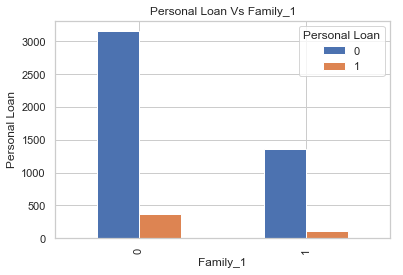

In [36]:
# Family_1 vs Personal Loan
pd.crosstab(univBankData.Family_1,univBankData['Personal Loan']).plot(kind='bar')
plt.title('Family1 Vs Personal Loan')
plt.xlabel('Family_1')
plt.ylabel('Personal Loan')
plt.savefig('univBankData_family1_Vs_PL')

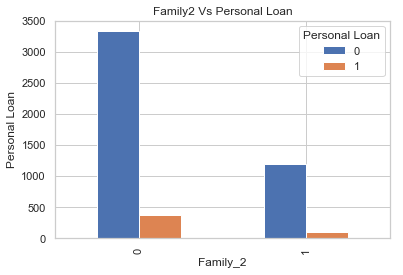

In [37]:
# Family_2 vs Personal Loan
pd.crosstab(univBankData.Family_2,univBankData['Personal Loan']).plot(kind='bar')
plt.title('Family2 Vs Personal Loan')
plt.xlabel('Family_2')
plt.ylabel('Personal Loan')
plt.savefig('univBankData_family2_Vs_PL')

In [38]:
xList=['Age','Experience','Income','CCAvg','Mortgage','Securities Account','CD Account','Online','CreditCard','Family_1','Family_2','Family_3','Family_4','Education_1','Education_2','Education_3']
x = univBankData[xList]
y=univBankData['Personal Loan']

In [39]:
x.head(5)

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
ID,,,,,,,,,,,,,,,,
1,25,1,49,1.6,0,1,0,0,0,0,0,0,1,1,0,0
2,45,19,34,1.5,0,1,0,0,0,0,0,1,0,1,0,0
3,39,15,11,1.0,0,0,0,0,0,1,0,0,0,1,0,0
4,35,9,100,2.7,0,0,0,0,0,1,0,0,0,0,1,0
5,35,8,45,1.0,0,0,0,0,1,0,0,0,1,0,1,0


In [40]:
y.head(5)

ID
1    0
2    0
3    0
4    0
5    0
Name: Personal Loan, dtype: int64

In [41]:
#Implememting the model
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.113102
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4985
Method:                           MLE   Df Model:                           14
Date:                Fri, 10 May 2019   Pseudo R-squ.:                  0.6423
Time:                        20:54:52   Log-Likelihood:                -565.51
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0372      0.069     -0.542      0.588      -0.172       0.097
Exper

In [42]:
x_train,x_test,y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=100)
logreg =LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
y_pred = logreg.predict(x_test)

In [44]:
logreg.score(x_test,Y_test)

0.9506666666666667

In [45]:
#Cross validation
kfold = model_selection.KFold(n_splits=10,random_state=7)
modelCV = LogisticRegression()

scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,x_train,y_train,cv=kfold,scoring=scoring)

print("10-fold cross validation average accuracy : %.3f" %(results.mean()))

10-fold cross validation average accuracy : 0.963


In [46]:
#Confusion Matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix)

[[1323   19]
 [  55  103]]


In [47]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1342
           1       0.84      0.65      0.74       158

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500

